In [1]:
import pandas as pd
import seaborn as sns
import random
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BIAIS_SN="biais de somme nulle"
SOMME_ECART_ABSOLU="somme des écarts absolus"

In [3]:
meta_df=pd.DataFrame(columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"])

In [4]:
def afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color=None):
    df = pd.read_csv(file,header=None)
    df.columns=[nom_bias]
    sns.displot(df[nom_bias],kde=True,color=color)
    new_row_meta_df= pd.DataFrame(
            [(file,df[nom_bias].mean(),df[nom_bias].std()
             ,df[nom_bias].min()
            ,df[nom_bias].max()
            ,df[nom_bias].median()
             )],
            columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"],
        )
    meta_df=pd.concat([meta_df, new_row_meta_df])
    return meta_df

In [5]:
def afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,nom_bias,color=None):
    for file in liste:
        meta_df=afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color)
    return meta_df

# Simulations Monte-Carlo

## 1. Scenarios d'ajout cumulés et loi uniforme sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

<AxesSubplot:ylabel='Count'>

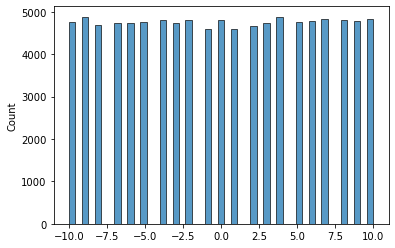

In [6]:
l=[random.randint(-10,10) for _ in range(100000)]
sns.histplot(l)

### 1.1 n=10 ajouts et m=20 entités

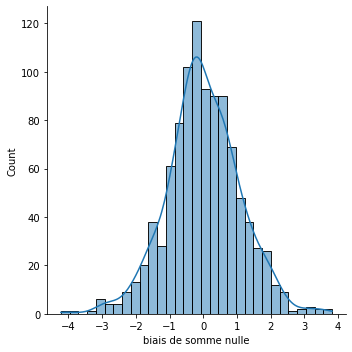

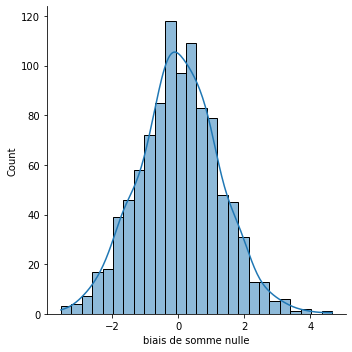

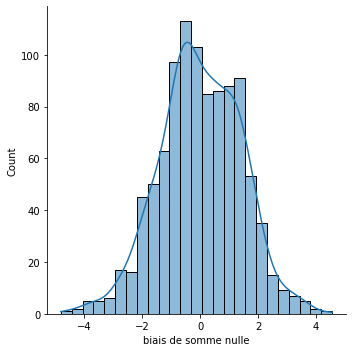

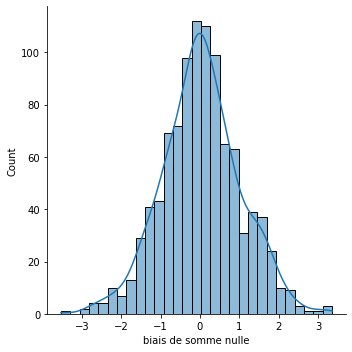

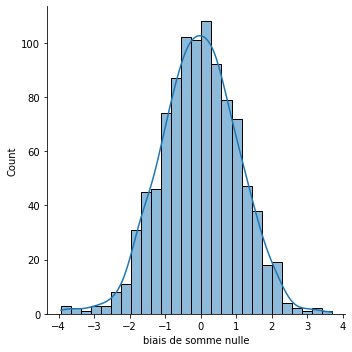

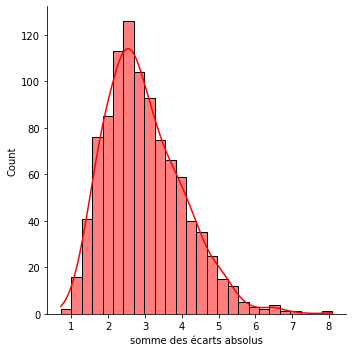

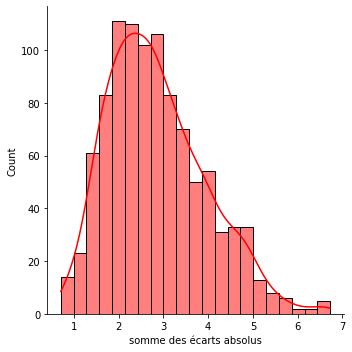

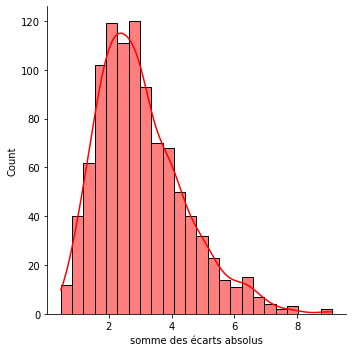

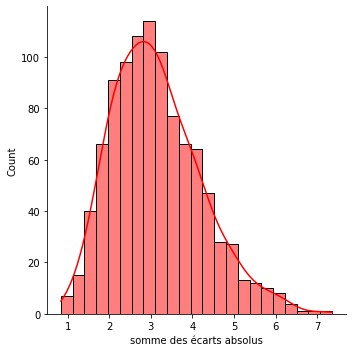

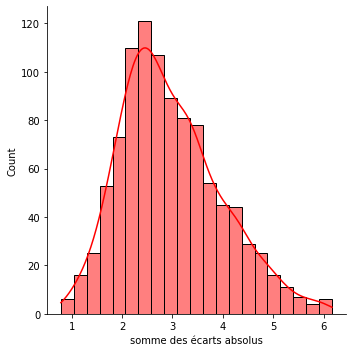

In [7]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220920_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_uniform_220920_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 1.2 n=100 ajouts et m=20 entités

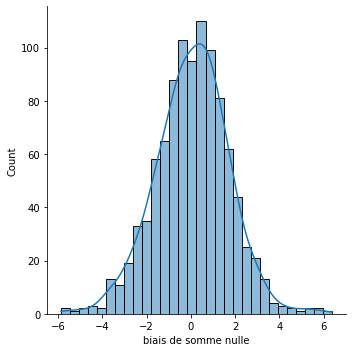

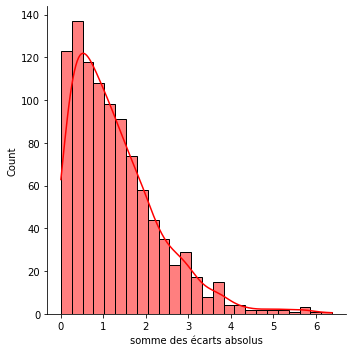

In [8]:
DIRECTORY="20_entities_100_samples"
liste=["{}/score_20_100_uniform_220918_clean_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_100_uniform_220918_mea_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

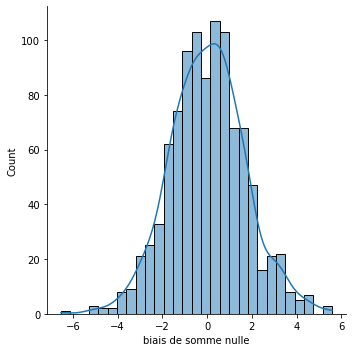

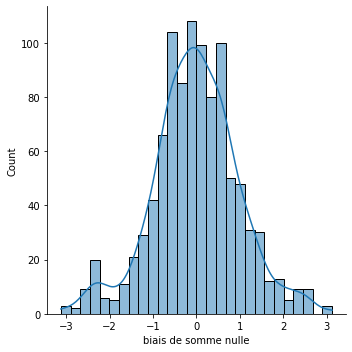

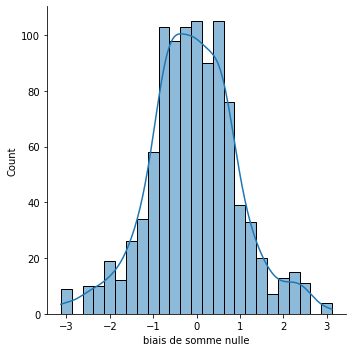

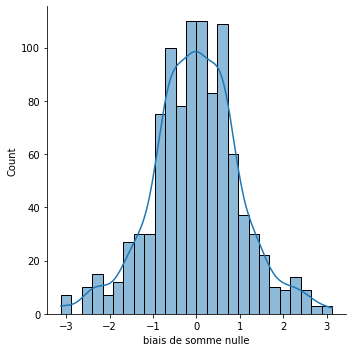

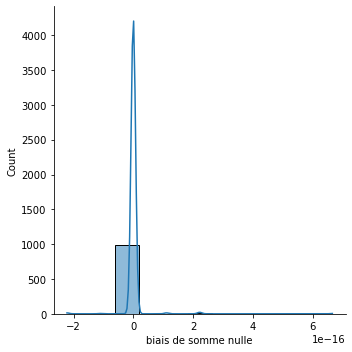

In [9]:
liste=["100_entities_10_samples/score_100_10_1_clean.csv",
       "100_entities_10_samples/score_100_10_2_clean.csv",
       "100_entities_10_samples/score_100_10_3_clean.csv",
       "100_entities_10_samples/score_100_10_4_clean.csv",
       "100_entities_10_samples/score_100_10_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

## 2. Scenarios d'ajout cumulés et loi gaussienne discrète sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

(array([   4.,    9.,   44.,   94.,  180.,  312.,  553.,  790.,  981.,
        1295., 1301., 1336., 1057.,  808.,  545.,  336.,  197.,   97.,
          41.,   15.,    5.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

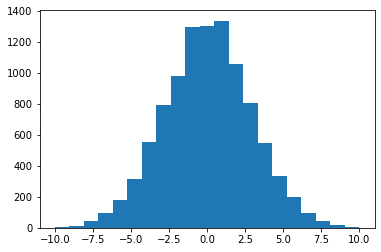

In [10]:
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 2.1 n=10 ajouts et m=20 entités

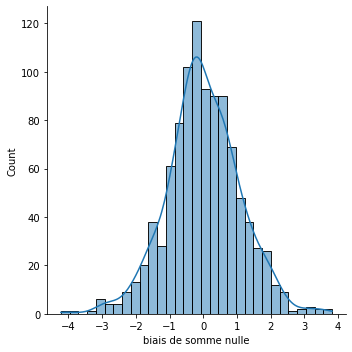

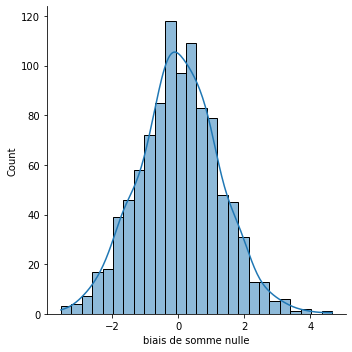

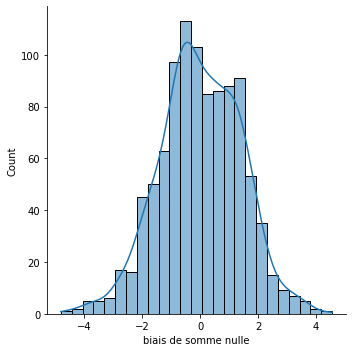

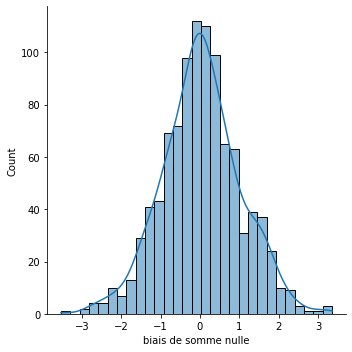

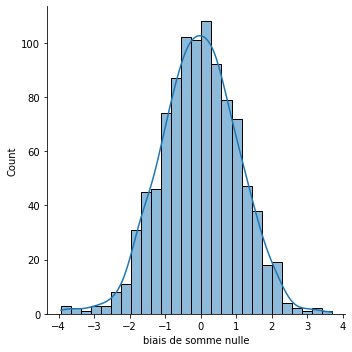

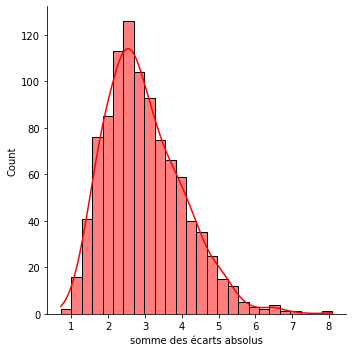

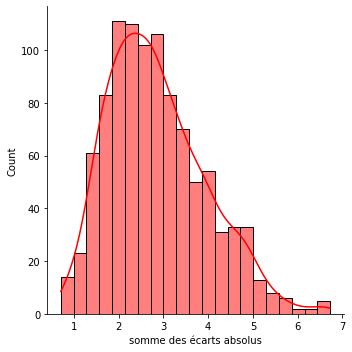

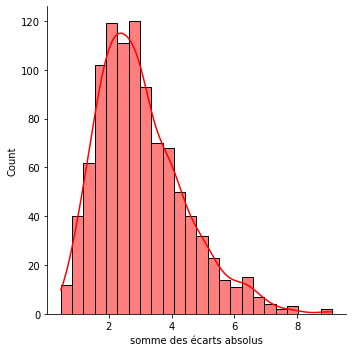

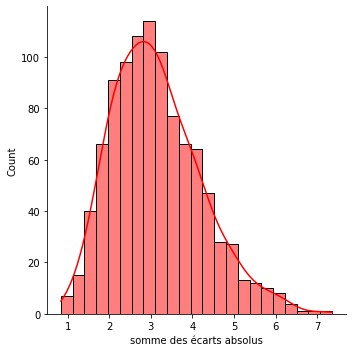

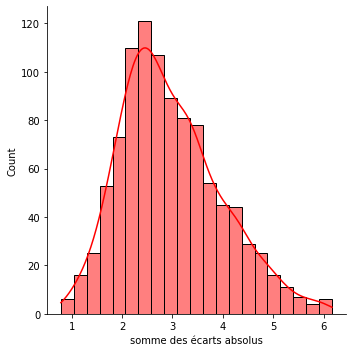

In [11]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220920_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_uniform_220920_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 2.2 n=100 ajouts et m=20 entités

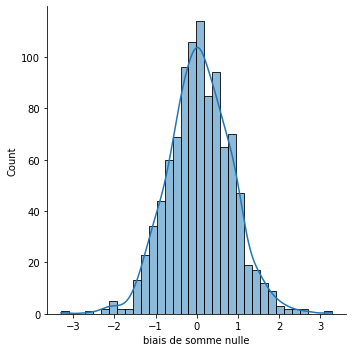

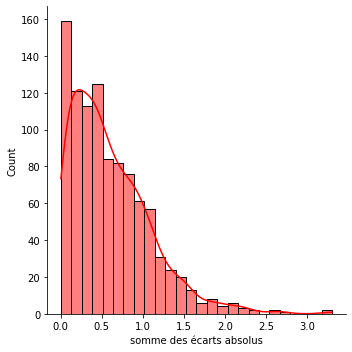

In [12]:
DIRECTORY="20_entities_100_samples"
liste=["{}/score_20_100_gaussian_220916_clean_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_100_gaussian_220916_mea_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

## 3. Scenarios d'ajout cumulés et de deux loi gaussiennes discrètes centrées sur les bornes sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

(array([1155., 1095.,  906.,  713.,  503.,  326.,  143.,   69.,   29.,
          17.,    4.,   10.,   24.,   87.,  183.,  282.,  514.,  726.,
         959., 1119., 1136.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

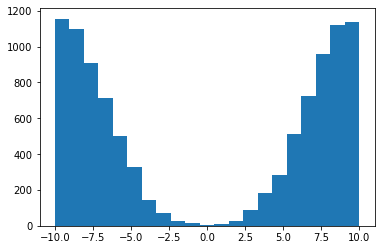

In [13]:
x = np.arange(-10, 11)
prob= np.array([0.13242928, 0.12533694,
 0.1062586,  0.08069342, 0.05489084, 0.03344625, 0.01825486, 0.00892463,
 0.00390822, 0.00153299,
0.00053861, 0.00153299, 0.00390822, 0.00892463, 0.01825486, 0.03344625,
 0.05489084, 0.08069342, 0.1062586,  0.12533694, 0.13242928])
prob = prob / prob.sum()
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 3.1 n=10 ajouts et m=20 entités

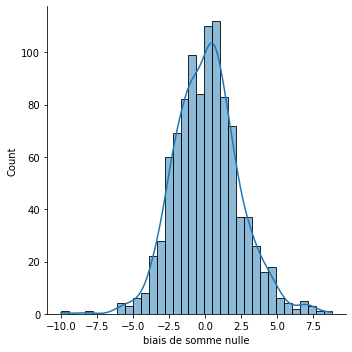

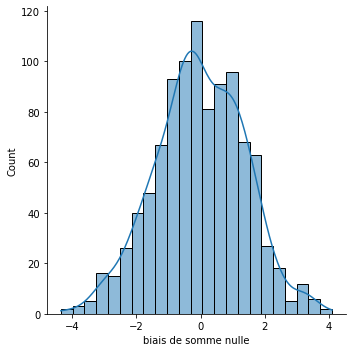

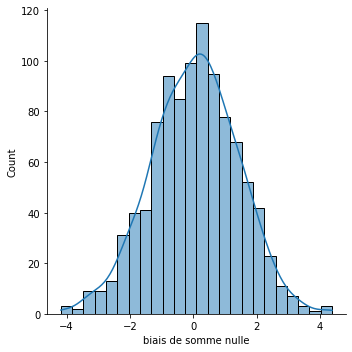

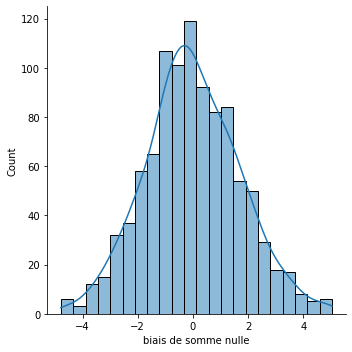

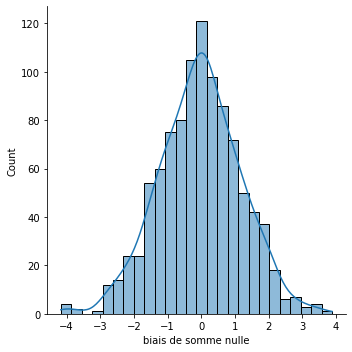

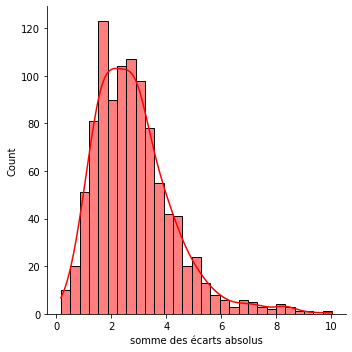

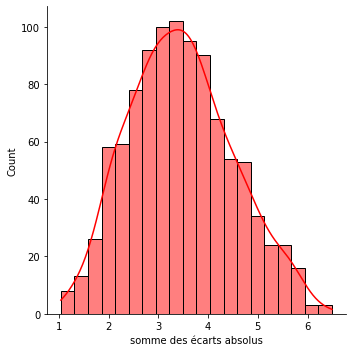

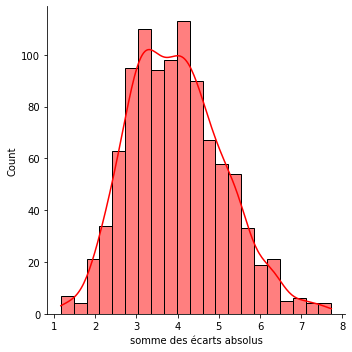

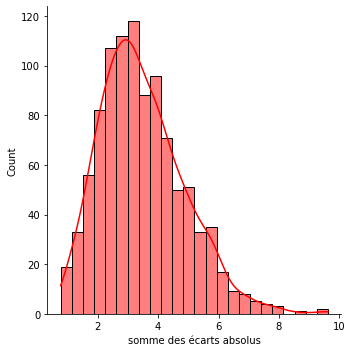

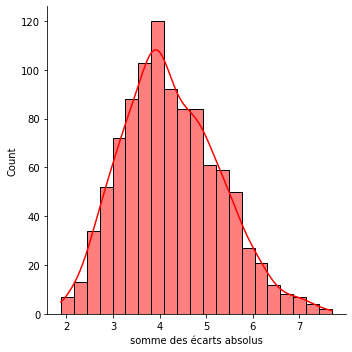

In [14]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_invgaussian_220920_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_invgaussian_220920_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.2 n=100 ajouts et m=20 entités

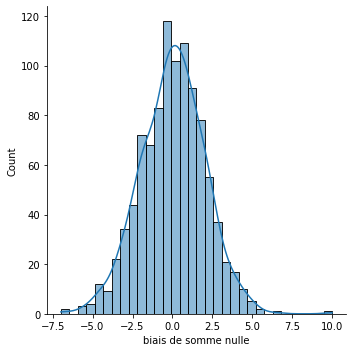

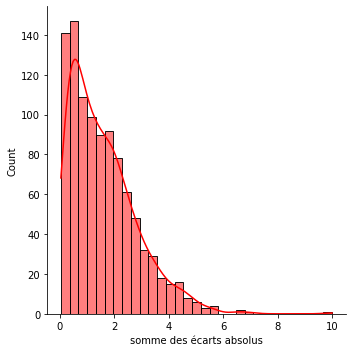

In [15]:
DIRECTORY="20_entities_100_samples"
liste=["{}/score_20_100_invgaussian_220911_clean_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_100_invgaussian_220911_mea_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [16]:
meta_df

,file,biais_sn_moyen,biais_sn_std,biais_sn_min,biais_sn_max,biais_sn_med
0,20_entities_10_samples/score_20_10_uniform_220...,0.004302,1.081731,-4.221696,3.816676,-0.047356
0,20_entities_10_samples/score_20_10_uniform_220...,0.028652,1.222032,-3.558131,4.652464,0.005155
0,20_entities_10_samples/score_20_10_uniform_220...,0.011222,1.394415,-4.80359,4.548079,-0.026825
0,20_entities_10_samples/score_20_10_uniform_220...,0.031401,0.992338,-3.539614,3.3581,0.017426
0,20_entities_10_samples/score_20_10_uniform_220...,-0.036187,1.078458,-3.93776,3.700238,-0.023588
0,20_entities_10_samples/score_20_10_uniform_220...,2.970194,1.054988,0.715369,8.082393,2.809386
0,20_entities_10_samples/score_20_10_uniform_220...,2.858221,1.093386,0.709532,6.725462,2.705858
0,20_entities_10_samples/score_20_10_uniform_220...,3.02286,1.383437,0.47087,9.111443,2.795471
0,20_entities_10_samples/score_20_10_uniform_220...,3.134936,1.072613,0.835578,7.356697,3.017208
0,20_entities_10_samples/score_20_10_uniform_220...,2.966695,0.99347,0.78745,6.163785,2.813198
